# imports & load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
train = pd.read_csv('train_V2.csv')

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


# look at data

In [8]:
train.describe().round(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,...,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446966.00,4446965.00
mean,0.23,1.11,130.72,0.66,0.23,1.37,47.60,505.01,0.92,0.54,...,0.16,606.12,0.00,4.51,0.02,0.01,1154.22,3.66,606.46,0.47
std,0.59,1.72,170.78,1.15,0.60,2.68,27.46,627.50,1.56,0.71,...,0.47,1498.34,0.07,30.50,0.17,0.09,1183.50,2.46,739.70,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,155.10,2.00,0.00,0.20
50%,0.00,0.00,84.24,0.00,0.00,0.00,47.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,685.60,3.00,0.00,0.46
75%,0.00,2.00,186.00,1.00,0.00,2.00,71.00,1172.00,1.00,1.00,...,0.00,0.19,0.00,0.00,0.00,0.00,1976.00,5.00,1495.00,0.74
max,22.00,33.00,6616.00,53.00,64.00,80.00,101.00,2170.00,72.00,20.00,...,39.00,40710.00,18.00,3823.00,12.00,5.00,25780.00,236.00,2013.00,1.00


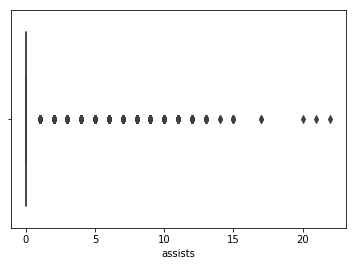

In [9]:
sns.boxplot(train.assists)

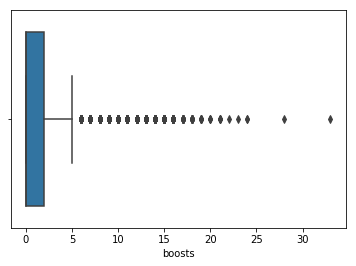

In [10]:
sns.boxplot(train.boosts)

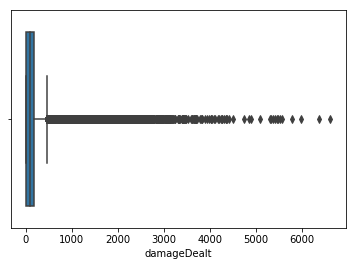

In [11]:
sns.boxplot(train.damageDealt)

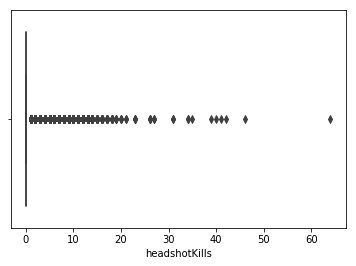

In [12]:
sns.boxplot(train.headshotKills)

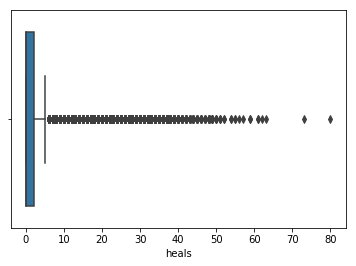

In [13]:
sns.boxplot(train.heals)

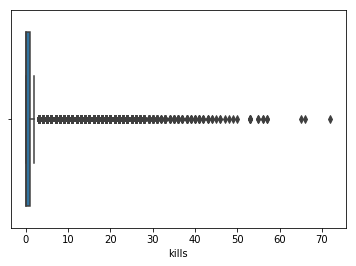

In [14]:
sns.boxplot(train.kills)

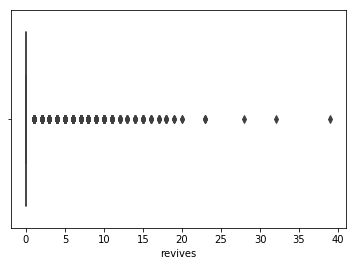

In [15]:
sns.boxplot(train.revives)

# correlations

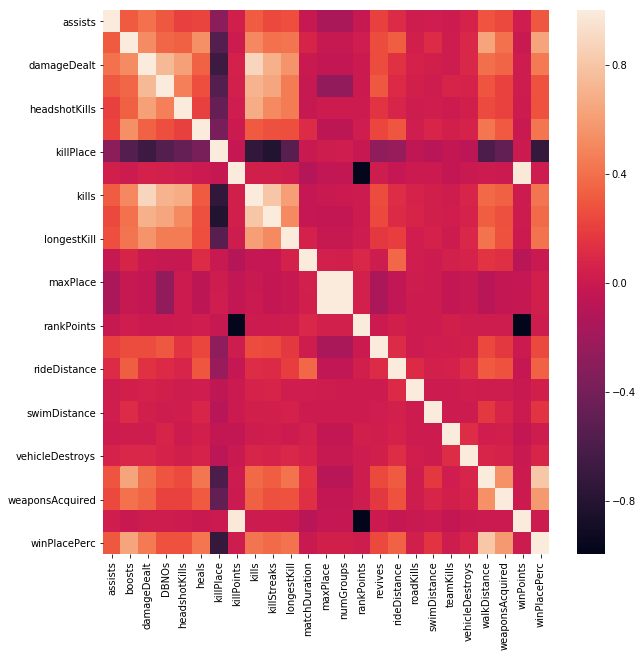

In [18]:
ax = sns.heatmap(train.corr())
ax.figure.set_size_inches((10,10))

# baseline model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = train
# X = pd.get_dummies(X)
X = X.select_dtypes(include=['int64', 'float64'])
X.dropna(inplace=True)

y = X.pop('winPlacePerc')


clf = LinearRegression()

/Users/matthew/anaconda3/envs/pubg/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [14]:
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
test = pd.read_csv('test_V2.csv')
X_test = test.select_dtypes(include=['int64', 'float64'])

In [18]:
submission = clf.predict(X_test)

In [19]:
submission

array([0.19456342, 0.89383474, 0.4475888 , ..., 0.80727646, 0.73903763,
       0.02682803])

In [24]:
mean_absolute_error(y_true=y, y_pred=clf.predict(X))

0.09264538063805232

In [39]:
pd.DataFrame(submission, columns=['winPlacePerc']).set_index(test.Id).to_csv('submission.csv')